In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn.metrics import confusion_matrix

In [4]:
x_train = np.loadtxt("C:\\Users\\Joe\Desktop\\Tufts Fall 2022\\CS 135\\project01\\data_digits_8_vs_9_noisy\\x_train.csv", delimiter=',', skiprows=1)
x_test = np.loadtxt("C:\\Users\\Joe\Desktop\\Tufts Fall 2022\\CS 135\\project01\\data_digits_8_vs_9_noisy\\x_test.csv", delimiter=',', skiprows=1)
y_train = np.loadtxt("C:\\Users\\Joe\Desktop\\Tufts Fall 2022\\CS 135\\project01\\data_digits_8_vs_9_noisy\\y_train.csv", delimiter=',', skiprows=1)
y_test = np.loadtxt("C:\\Users\\Joe\Desktop\\Tufts Fall 2022\\CS 135\\project01\\data_digits_8_vs_9_noisy\\y_test.csv", delimiter=',', skiprows=1)


In [5]:
print('x_train shape =', x_train.shape)
print('y_train shape =', y_train.shape)
print('x_test shape =', x_test.shape)
print('y_test shape =',y_test.shape)

x_train shape = (11800, 784)
y_train shape = (11800,)
x_test shape = (1983, 784)
y_test shape = (1983,)


In [6]:
def plot_row(arr, ax = False):
    plt.imshow(arr.reshape(28,28), cmap = 'Greys', vmin= 0, vmax=1)
    if not(ax):
        plt.axis('off')
   

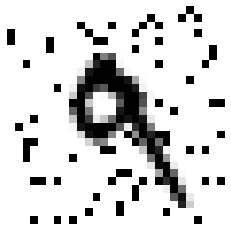

In [7]:
plot_row(x_test[0])

In [8]:
#Performing PCA to gauge the variance of the data

In [9]:
from sklearn.decomposition import PCA

In [10]:
x_train_pca_model = PCA(n_components=784)
x_train_pca_model.fit_transform(x_train)

array([[-1.09628964e+00, -2.83913268e+00, -8.86760894e-02, ...,
         3.04704776e-02, -2.80111575e-02,  2.95986950e-03],
       [ 3.03694171e+00, -7.18426311e-01,  1.96093682e-01, ...,
        -1.40969911e-02, -1.35000699e-02,  6.57630046e-02],
       [ 1.29781810e+00, -2.39662830e+00, -1.54657519e+00, ...,
         3.11617402e-02, -1.77752531e-01,  1.15149917e-01],
       ...,
       [ 7.28494031e-01, -2.18967620e+00, -5.74301397e-01, ...,
         1.53452374e-01, -6.84139449e-02, -3.42794252e-02],
       [ 2.46427670e+00,  1.17750193e+00, -6.19764827e-01, ...,
        -1.45990393e-03,  1.97613524e-02, -8.75775805e-02],
       [ 1.77044655e+00, -1.13803636e+00,  5.14484332e-01, ...,
        -2.52914336e-02, -1.40348283e-01, -2.10445396e-02]])

In [11]:
num_components = np.arange(1,785)
len(num_components)

784

In [12]:
var_explained = list()
for i in range(1,len(num_components)+1):
    var = sum(x_train_pca_model.explained_variance_ratio_[0:i])
    var_explained.append(var)
var_explained = np.array(var_explained)

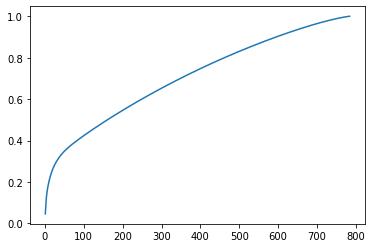

In [13]:
sns.lineplot(x=num_components, y=var_explained)
plt.show;

In [14]:
#Start the assignment

In [15]:
#Part One Question 1

In [16]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [17]:
lr_model1 = LogisticRegression(solver='liblinear', random_state=1)

In [18]:
lr_model1.fit(x_train, y_train)


LogisticRegression(random_state=1, solver='liblinear')

In [19]:
pred_y_train = lr_model1.predict(x_train)

In [20]:
lr_model1.score(x_train, y_train)

0.9909322033898305

In [21]:
log_loss(y_train, pred_y_train)

0.31319419092536055

In [22]:
iterations = np.arange(0,41)

In [23]:
logloss = list()
mean_accuracy = list()
coef1 = list()

for i in iterations:
    lr_iter_model = LogisticRegression(solver='liblinear', max_iter=i, random_state=1)
    lr_iter_model.fit(x_train, y_train)
    pred_iter_y_train = lr_iter_model.predict(x_train)
    logloss.append(log_loss(y_train,pred_iter_y_train ))
    mean_accuracy.append(lr_iter_model.score(x_train,y_train))
    coef1.append(lr_iter_model.coef_[0][0])

logloss = np.array(logloss)
mean_accuracy = np.array(mean_accuracy)
coef1 = np.array(coef1)


C:\Users\Joe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Joe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Joe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Joe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed t

In [24]:
#plots for P1 Q1&2

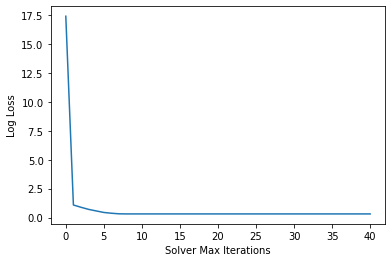

In [25]:
sns.lineplot(x=iterations, y=logloss)
plt.xlabel('Solver Max Iterations')
plt.ylabel('Log Loss')
plt.show;

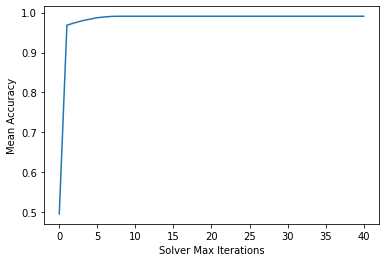

In [26]:
sns.lineplot(x=iterations,y=mean_accuracy)
plt.xlabel('Solver Max Iterations')
plt.ylabel('Mean Accuracy')
plt.show;

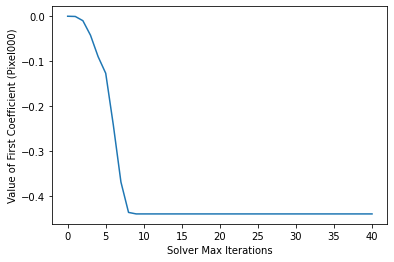

In [27]:
sns.lineplot(x=iterations, y=coef1)
plt.xlabel('Solver Max Iterations')
plt.ylabel('Value of First Coefficient (Pixel000)')
plt.show;

In [28]:
# Part One Q3

In [29]:
C_grid = np.logspace(-9,6,31)
C_grid

array([1.00000000e-09, 3.16227766e-09, 1.00000000e-08, 3.16227766e-08,
       1.00000000e-07, 3.16227766e-07, 1.00000000e-06, 3.16227766e-06,
       1.00000000e-05, 3.16227766e-05, 1.00000000e-04, 3.16227766e-04,
       1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03, 3.16227766e+03, 1.00000000e+04, 3.16227766e+04,
       1.00000000e+05, 3.16227766e+05, 1.00000000e+06])

In [30]:
#Using L2 ridge Regression

reg_log_loss = list()

for i in C_grid:
    reg_lr_mdoel = LogisticRegression(solver='liblinear', penalty= 'l2',C=i , random_state=1)
    reg_lr_mdoel.fit(x_train, y_train)
    pred_reg_lr_model = reg_lr_mdoel.predict(x_test)
    reg_log_loss.append(log_loss(y_test,pred_reg_lr_model))
    
reg_log_loss = np.array(reg_log_loss)

 

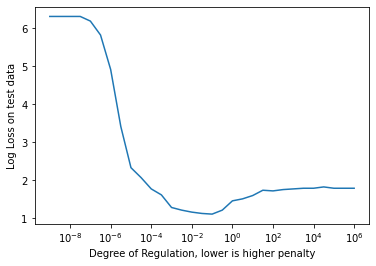

In [31]:
sns.lineplot(x=C_grid, y=reg_log_loss)
plt.xscale('log')
plt.xlabel('Degree of Regulation, lower is higher penalty')
plt.ylabel('Log Loss on test data')
plt.show;

In [32]:
print(min(reg_log_loss))

reg_min_index = np.argmin(reg_log_loss)
print(reg_min_index)
C_grid[reg_min_index]

1.1147288332788965
16


0.1

In [33]:
#Using L1 lasso Regression
'''
reg_log_loss = list()

for i in C_grid:
    reg_lr_mdoel = LogisticRegression(solver='liblinear', penalty= 'l1',C=i , random_state=1)
    reg_lr_mdoel.fit(x_train, y_train)
    pred_reg_lr_model = reg_lr_mdoel.predict(x_test)
    reg_log_loss.append(log_loss(y_test,pred_reg_lr_model))
    
reg_log_loss = np.array(reg_log_loss)

 '''

"\nreg_log_loss = list()\n\nfor i in C_grid:\n    reg_lr_mdoel = LogisticRegression(solver='liblinear', penalty= 'l1',C=i , random_state=1)\n    reg_lr_mdoel.fit(x_train, y_train)\n    pred_reg_lr_model = reg_lr_mdoel.predict(x_test)\n    reg_log_loss.append(log_loss(y_test,pred_reg_lr_model))\n    \nreg_log_loss = np.array(reg_log_loss)\n\n "

In [34]:
#'''sns.lineplot(x=C_grid, y=reg_log_loss)
#plt.xscale('log')
#plt.xlabel('Degree of Regulation, lower is higher penalty')
#plt.ylabel('Log Loss on test data')
#plt.show;


In [35]:
'''print(min(reg_log_loss))

reg_min_index = np.argmin(reg_log_loss)
print(reg_min_index)
C_grid[reg_min_index]
'''

'print(min(reg_log_loss))\n\nreg_min_index = np.argmin(reg_log_loss)\nprint(reg_min_index)\nC_grid[reg_min_index]\n'

In [36]:
#The above suggests a lambda of 10 is best

In [37]:
#statistics on the model with lambda of 10

In [38]:
best_reg_lr_model = LogisticRegression(solver='liblinear', penalty = 'l2', C=.1, random_state = 1)
best_reg_lr_model.fit(x_train, y_train)

LogisticRegression(C=0.1, random_state=1, solver='liblinear')

In [39]:
best_reg_lr_model_probs = best_reg_lr_model.predict_proba(x_test)

In [40]:
pred_probs_brlr = best_reg_lr_model_probs[:,1]

In [41]:
thresholds = np.arange(0,1,.05)

In [42]:
accuracy_list = list()
for thresh in thresholds:
    preds = list()
    for prob in pred_probs_brlr:
        if prob >= thresh:
            preds.append(1)
        else:
            preds.append(0)
    TP = 0
    TN = 0
    FP = 0
    FN = 0

    for i in range(0,len(y_test)):
        if y_test[i] == 1:
            if preds[i] == 1:
                TP += 1
            else:
                FN += 1
        else:
            if preds[i] == 0:
                TN += 1
            else:
                FP += 1

    acc = (TP+TN)/(len(y_test))
    accuracy_list.append(acc)

In [43]:
accuracy_list = np.array(accuracy_list)

In [44]:
best_thresh = thresholds[np.argmax(accuracy_list)]
best_thresh

0.6000000000000001

In [45]:
best_reg_lr_model.score(x_test,y_test)

0.967725668179526

In [46]:
np.max(accuracy_list)

0.9707513867876955

In [47]:
def calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh=0.5):
    ''' Compute the confusion matrix for a given probabilistic classifier and threshold
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh
        Default value reflects a majority-classification approach (class is the one that gets
        highest probability)

    Returns
    -------
    cm_df : Pandas DataFrame
        Can be printed like print(cm_df) to easily display results
    '''
    cm = confusion_matrix(ytrue_N, yproba1_N >= thresh)
    cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    return cm_df

In [48]:
calc_confusion_matrix_for_threshold(y_test,pred_probs_brlr,.5)

Predicted,0,1
True,,
0,942,32
1,32,977


In [49]:
calc_confusion_matrix_for_threshold(y_test, pred_probs_brlr, .6)

Predicted,0,1
True,,
0,951,23
1,35,974


In [50]:
#False Positives are 8s that are called 9s
#False Negatives are 9s that are called 8s

In [51]:
#Generate predictions for our .6 threshold:

pred_test_best_thresh = list()
for prob in pred_probs_brlr:
        if prob >= best_thresh: #.6
            pred_test_best_thresh.append(1)
        else:
            pred_test_best_thresh.append(0)

In [52]:
#Generate list of false positive indices
fp_count = 0
fp_indices = list()
while fp_count < 9:
    for i in range(0,len(y_test)):
        if y_test[i] == 0 and pred_test_best_thresh[i] ==1:
            fp_indices.append(i)
            fp_count += 1
            if fp_count == 9:
                break
fp_indices

[69, 156, 174, 290, 344, 352, 401, 440, 464]

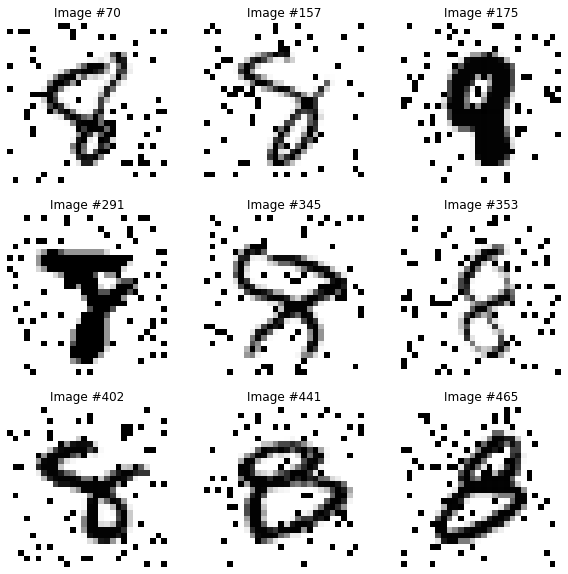

In [53]:
#plot the false positives
fig = plt.figure(figsize=(10,10))
rows = 3
cols = 3

for i in fp_indices:
    indic = fp_indices.index(i)
    fig.add_subplot(rows,cols,indic+1)
    plt.imshow(x_test[i].reshape(28,28), cmap = 'Greys', vmin=0, vmax=1)
    plt.axis('off')
    plt.title(f'Image #{i+1}')

In [54]:
#Generate the list of False negatives
fn_count = 0
fn_indices = list()
while fn_count < 9:
    for i in range(0,len(y_test)):
        if y_test[i] == 1 and pred_test_best_thresh[i] ==0:
            fn_indices.append(i)
            fn_count += 1
            if fn_count == 9:
                break
fn_indices


[39, 56, 79, 160, 206, 225, 229, 294, 335]

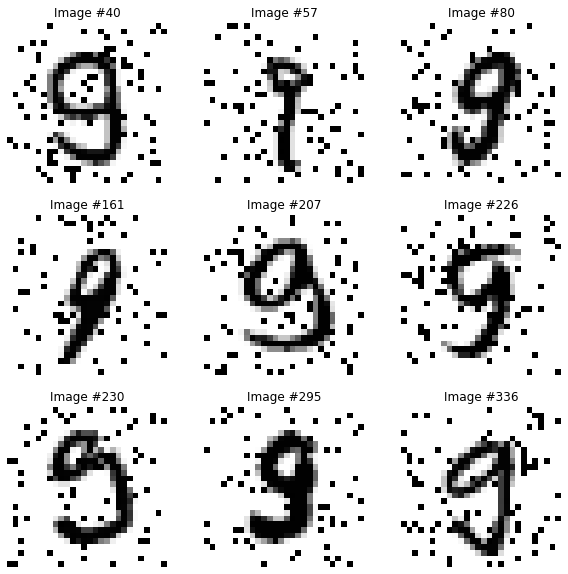

In [55]:
#plot the false positives
fig = plt.figure(figsize=(10,10))
rows = 3
cols = 3

for i in fn_indices:
    indic = fn_indices.index(i)
    fig.add_subplot(rows,cols,indic+1)
    plt.imshow(x_test[i].reshape(28,28), cmap = 'Greys', vmin=0, vmax=1)
    plt.axis('off')
    plt.title(f'Image #{i+1}')

In [56]:
coef_mat = best_reg_lr_model.coef_.reshape(28,28)


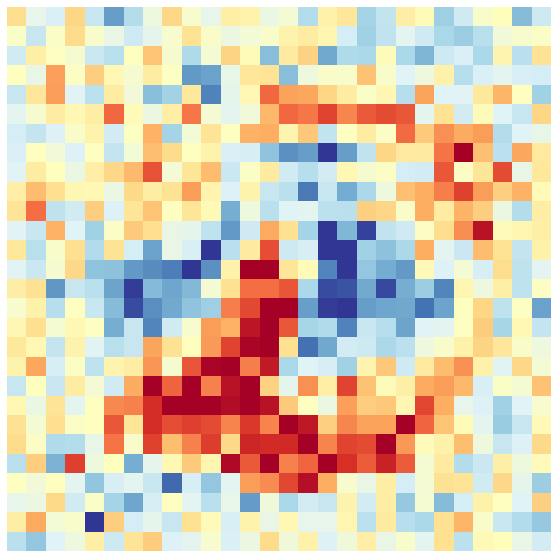

In [57]:
plt.figure(figsize=(10,10))
plt.imshow(coef_mat, cmap ='RdYlBu', vmin=-.5, vmax=0.5)
plt.axis('off')
plt.imshow;

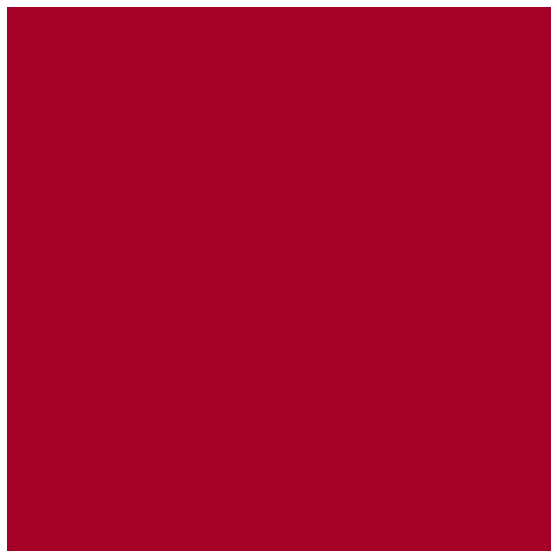

In [62]:
plt.figure(figsize=(10,10))
plt.imshow(np.ones(28*28).reshape(28,28)*-1, cmap ='RdYlBu', vmin=-.5, vmax=0.5)
plt.axis('off')
plt.imshow;

In [ ]:
##~~~~NEED TO ADD ANALYSIS/DESCRIPTIONS/EXPLANATIONS FOR ALL OF THE ABOVE~~~~~~~###

In [59]:
####### END OF PART ONE ######################